In [1]:
import numpy as np
import pandas as pd
import shutil, time, os, requests, random, copy
import PIL
from PIL import Image
import matplotlib.pyplot as plt 
from tqdm import tqdm

import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms, models
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.manifold import TSNE

import preprocessing.VideoFrameDataset as VFD
import model.Encoder as E
import model.Loss as L

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
model = E.ResNet18Encoder()  
model = model.to(device)
state_dict = torch.load('saved_models/1_28_25_0.0001_7_0.1_ResNet-50.pth')
model.load_state_dict(state_dict)

/home/aarya/miniconda3/envs/pytorch/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/aarya/miniconda3/envs/pytorch/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

In [3]:
dataset = VFD.VideoFrameDataset('data/camera_1_videos', 5)
dataloader = DataLoader(dataset, 1, shuffle=False)

In [4]:
datapoints = np.empty((0, 64))
with torch.no_grad():
    for batch in dataloader:
        video = batch[0]
        for frame in video:
            frame = frame.unsqueeze(dim = 0)
            frame = frame.to(device)
            output = model(frame)
            datapoints = np.vstack([datapoints, output.detach().cpu().numpy()])

In [5]:
tsne_3D = TSNE(n_components=3, perplexity=30)
tsne_results_3D = tsne_3D.fit_transform(datapoints)

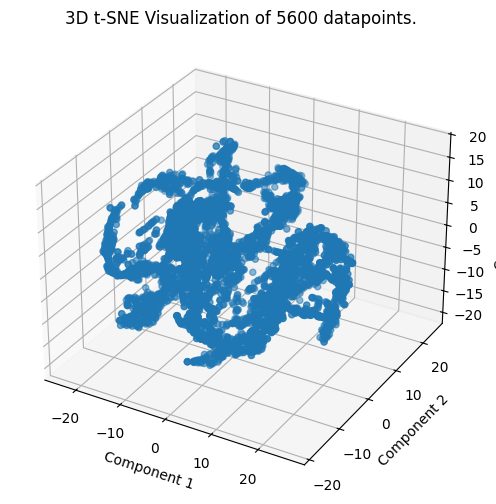

In [9]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_results_3D[:, 0], tsne_results_3D[:, 1], tsne_results_3D[:, 2])
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
ax.set_title("3D t-SNE Visualization of 5600 datapoints.")
plt.show()

In [10]:
import plotly.graph_objects as go

In [12]:
# Define trace for the 3D scatter plot
trace = go.Scatter3d(
    x=tsne_results_3D[:, 0],
    y=tsne_results_3D[:, 1],
    z=tsne_results_3D[:, 2],
    mode='markers',
    marker=dict(
        size=5,  # Adjust marker size as needed
        opacity=0.8,  # Adjust marker opacity as needed
    )
)

# Create the layout for the plot
layout = go.Layout(
    title="3D t-SNE Visualization",
    width=1200,  # Set width in pixels
    height=800,
    scene=dict(
        xaxis_title='Component 1',
        yaxis_title='Component 2',
        zaxis_title='Component 3'
    )
)

# Combine the trace and layout into a figure
fig = go.Figure(data=[trace], layout=layout)

# Display the interactive plot
fig.show()